In [1]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport
from unidecode import unidecode
import pickle as pkl
from joblib import dump

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
nltk.download('wordnet')


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from nltk.tokenize import word_tokenize
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score, accuracy_score,
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt


/var/folders/c3/74tsbvcd7f59g59y1gww3qk40000gn/T/ipykernel_1562/2692637174.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from Limpieza import Limpieza

In [3]:
#Crear el Pipeline con las transformaciones necesarias
pipeline = Pipeline([
    ('limpieza', Limpieza()),
    ('vectorizer', TfidfVectorizer(tokenizer=word_tokenize, stop_words=stopwords.words("spanish"))),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        criterion='gini',
        max_depth=100,
        random_state=4

    ))
])

In [4]:
data_t = pd.read_excel('./data/cat_345.xlsx')
data_t.sample(5)

,Textos_espanol,sdg
273,Según la encuesta basada en la población de 20...,3
940,El principal objetivo del reparto de costes ba...,3
509,"Sin embargo, se sabe relativamente poco sobre ...",3
2978,La desigualdad salarial de género también pued...,5
454,"Además, la autorregulación de 2016 (code de de...",3


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_t[["Textos_espanol"]], data_t["sdg"], random_state=1, stratify=data_t['sdg'])

In [6]:
X_train.shape, X_test.shape

((2250, 1), (750, 1))

In [7]:
y_train.shape, y_test.shape

((2250,), (750,))

In [8]:
pipeline.fit(X_train, y_train)

Limpieza
Transformado texto


/Users/sofiatorres/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('limpieza', Limpieza()),
                ('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x17746beb0>)),
                ('classifier',
                 RandomForestClassifier(max_depth=100, n_estimators=300,
                                        random_state=4))])

In [9]:
y_train_hash_predict = pipeline.predict(X_train)
y_test_hash_predict = pipeline.predict(X_test)

Transformado texto
Transformado texto


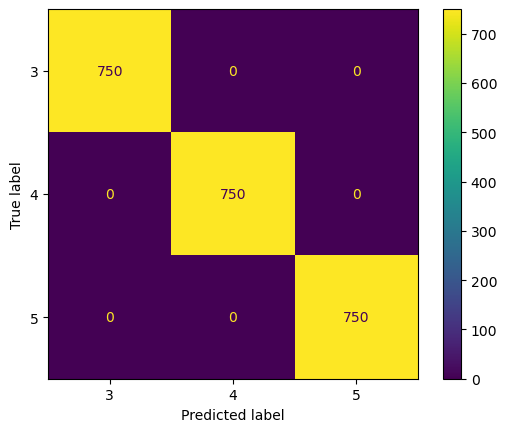

In [10]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_hash_predict)

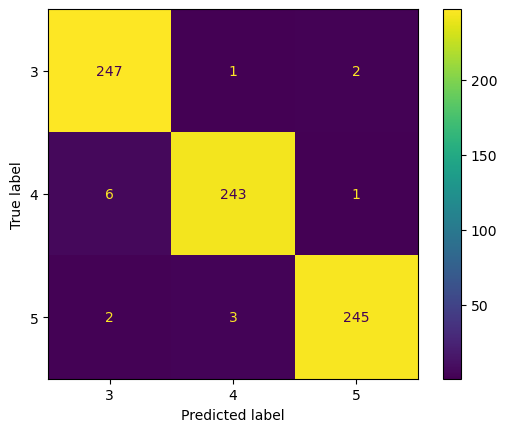

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_hash_predict)

In [12]:
rutaPipeline =  "pipeline.joblib"
dump(pipeline, rutaPipeline)

rutaPipeline =  "pipeline.pkl"
with open(rutaPipeline, 'wb') as file:
    pkl.dump(pipeline, file)